 # 개요
 
 전 장에서 신경망 학습에 대해 알아봤다. 신경망의 가중치 매개변수의 기울기(가중 매개변수에 대한 손실 함수의 기울기)는 수치 미분을 사용해 구했다. 수치 미분은 단수하고 구현하기 쉽지만 계산시간이 오래 걸린다는 게 단점이다. 
 
 이번 장에서는 가중치 매개변수의 기울기를 효율적을 계산하는 '오차역전파법'을 알아보자
 
 오차 역전파법을 제대로 이해하는 방법은 수식을 통한 방법이 있고 계산 그래프를 통해 알아볼 수있다. 이번 장에서는 특히 계산 그래프를 사용해서 시각적으로 이해해보겠다.
 
 참조 사이트: https://blog.naver.com/teach3450/221729790139   https://blog.naver.com/ssdyka/221305165719

 # 1.계산 그래프
 
 계산 그래프는 계산 과정을 그래프로 나타낸 것이다. 여기서의 그래프는 복수의 노드와 에지(노드 사이의 직선)로 표현된다.
 
 - 간단한 계산그래프
 
 문1) A는 슈퍼에서 1개에 100원인 사과 2개를 샀다. 이때 지불 금액을 구하라. 단, 소비세가 10% 부여된다.
 
 
 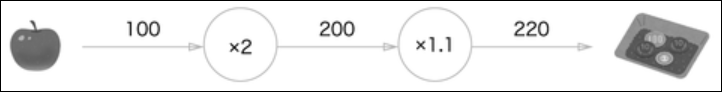
 
 
 
 - 계산 그래프로 풀어본 문제 1의 답
 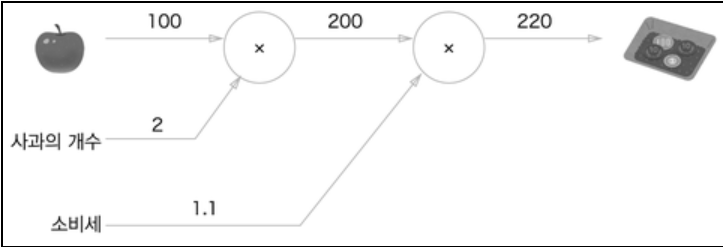

문2) A군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원이다. 소비세가 10%일 때 지불 금액을 구하시오
 
 - 계산 그래프로 풀어본 문2의 답
 
 
 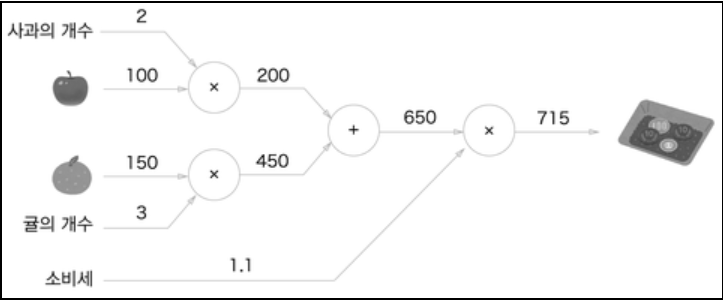
 
 위에서 살펴본 것처럼 계산 그래프를 이용한 문제풀이는 아래의 흐름으로 진행된다
 1. 계산 그래프를 구성
 2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행 (순전파)

 - 국소적 계산

국소적 계산이란 '자신과 직접 관계된 작은 범위'라는 의미로서 전체 상황과 관계없이 자신과 관련된 정보만으로 결과를 출력할 수 있다는 것을 의미하며 계산 그래프의 특징은 국소적 계싼을 전파함으로써 최종 결과를 얻는다는 점입니다.

국소적 계산의 구체적인 예로 슈퍼마켓에서 사과 2개를 포함한 여러 식품을 구입하는 경우를 생각해보자. 이를 아래의 그림과 같이 나타낼 수 있다.

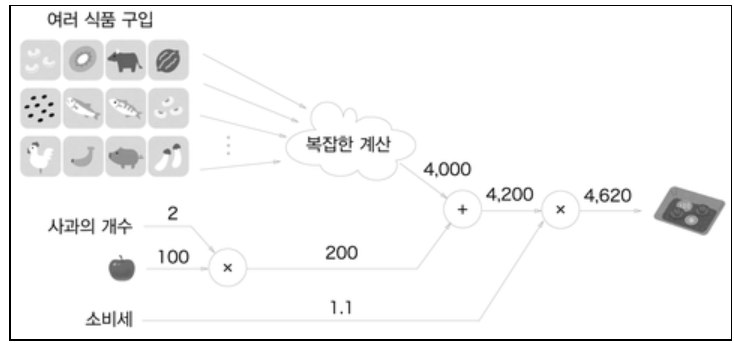


위 그림에서 보듯이 복잡한 계산은 신경쓰지 않고 그 결과 4000을 더하기만 하면 된다는 것

 - 계산 그래프의 이점
    
1. 국소적 계산 (문제를 단순화할 수 있다.)
2. 중간 계산 결과를 모두 보관할 수 있다.
3. 역전파를 통해 미분을 효율적으로 계산할 수 있다.

 - 역전파를 사용한 사과 문제
 
 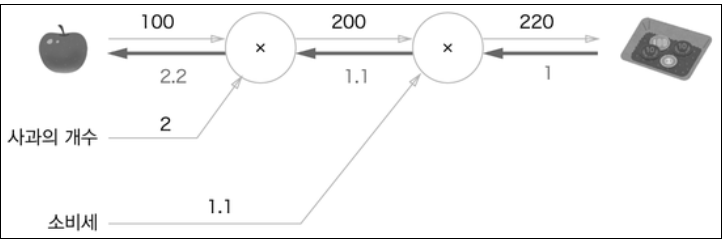
 
 
 ** 이와 같이 순전파와 역전파를 활용하여 각 변수의 미분을 효율적으로 구할 수 있다.

# 2. 연쇄법칙

지금까지 해온 계산 그래프의 순전파는 계산과정이 왼쪽에서 오른쪽으로 진행했으나 역전파는 국소적인 미분을 오른쪽에서 왼쪽으로 진행한다. 이때의 국소적 미분을 전달하는 원리는 연쇄법칙에 따른 것이다. 이 절에서는 연쇄법칙을 설명하고 그것이 계산 그래프 상의 역전파와 같다는 것을 밝힌다.

- 계산그래프의 역전파

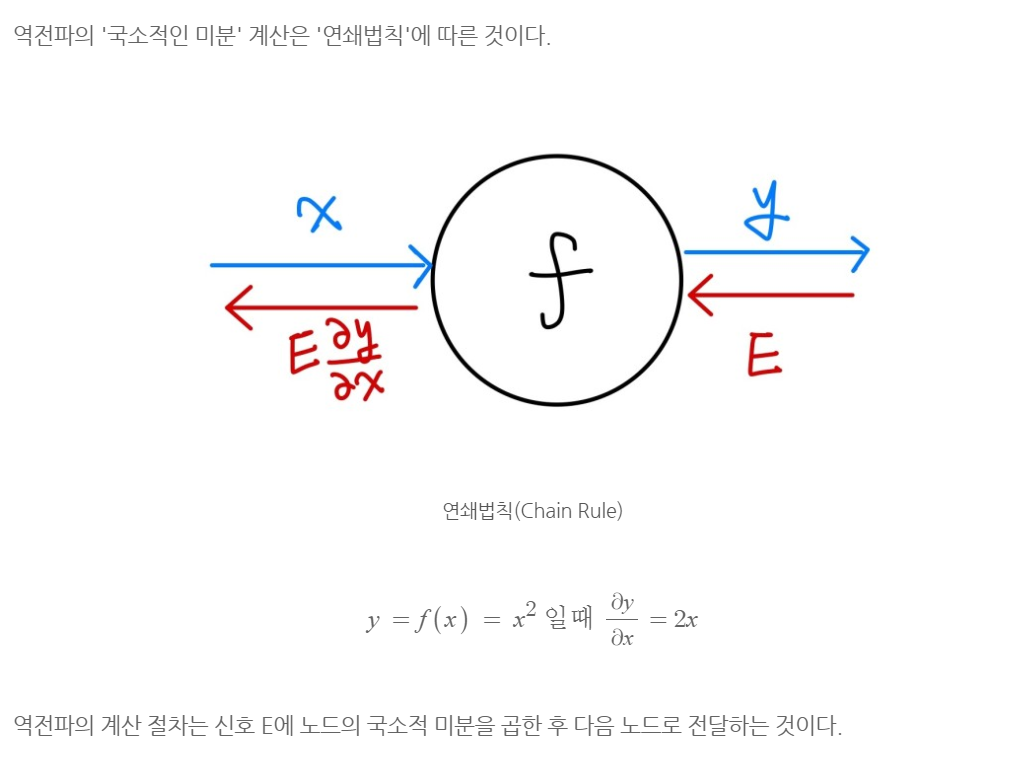

* 연쇄법칙이란?

연쇄법칙을 설명하려면 합성 함수를 이해해야 한다. 합성함수란 여러 함수로 구성된 함수로 예를 들어 z = (x+y)^2 는 아래와 같이 2개의 식으로 구성된다. z= t^2 , t= x+y , 연쇄법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의된다. 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

# 3. 단순한 계층 구현하기

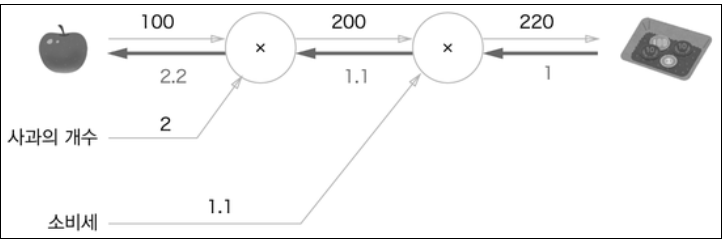

위와 같은 과정을 구현해보자 

In [8]:
# 곱셈 노드를 MulLayer, 덧셈 노드를 AddLayer로 구현
# forward(순전파), backward(역전파)
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy
    
# 구현
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)


220.00000000000003


In [2]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [2]:
# 덧셈 계층도 구현
class AddLayer():
    def __init__(self):
        pass
    
    def forward(self,x,y):
        out = x+y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    

In [11]:
# 100원짜리 사과 2개와 150원짜리 오렌지 3개를 구입한 가격은 단 세금은 10%로다. 
#즉 ((100 * 2) + (150*3)) * 1.1 을 구하시오라는 의미 이를 아래와 같이 구현할 수 있따

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num) 
orange_price = mul_orange_layer.forward(orange, orange_num) 
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  
price = mul_tax_layer.forward(all_price, tax) 

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  
dorange, dorange_num = mul_orange_layer.backward(dorange_price) 
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650
